# Clustering

### Getting Started

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
import seaborn as sns

### Import and Preprocess New Feature Engineered Dataset

In [2]:
df = pd.read_csv("../data/NewWordDifficulty.csv")
df.head()

,Word,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,PoS,SentimentScore
0,a,1,16.18,-0.01,0.73,1,-0.000000,DT,0.0
1,aah,3,5.40,0.21,0.62,2,0.918296,JJ,0.0
2,aaron,5,9.29,-0.11,0.97,3,1.921928,NN,0.0
3,aback,5,5.96,0.11,0.45,2,1.921928,NN,0.0
4,abacus,6,6.24,0.65,0.47,3,2.251629,NN,0.0


In [3]:
df = df.drop('PoS', axis=1)

In [4]:
# # One hot encode PoS column
# encoder = OneHotEncoder(sparse_output=False)
# encoded_data = encoder.fit_transform(df[['PoS']])
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PoS']))

# # Replace original PoS column
# df.drop('PoS', axis=1, inplace=True)
# df = pd.concat([df, encoded_df], axis=1)

In [5]:
df.set_index('Word', inplace=True)
df.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore
Word,,,,,,,
a,1,16.18,-0.01,0.73,1,-0.000000,0.0
aah,3,5.40,0.21,0.62,2,0.918296,0.0
aaron,5,9.29,-0.11,0.97,3,1.921928,0.0
aback,5,5.96,0.11,0.45,2,1.921928,0.0
abacus,6,6.24,0.65,0.47,3,2.251629,0.0


### One Vs. One Plot Against Difficulty

In [6]:
quantit_columns = ["Length", 
                   "Log_Freq_HAL", 
                   "I_Zscore", 
                   "I_Mean_Accuracy", 
                   "Vowels", 
                   "Entropy", 
                   "PoS", 
                   "SentimentScore"]

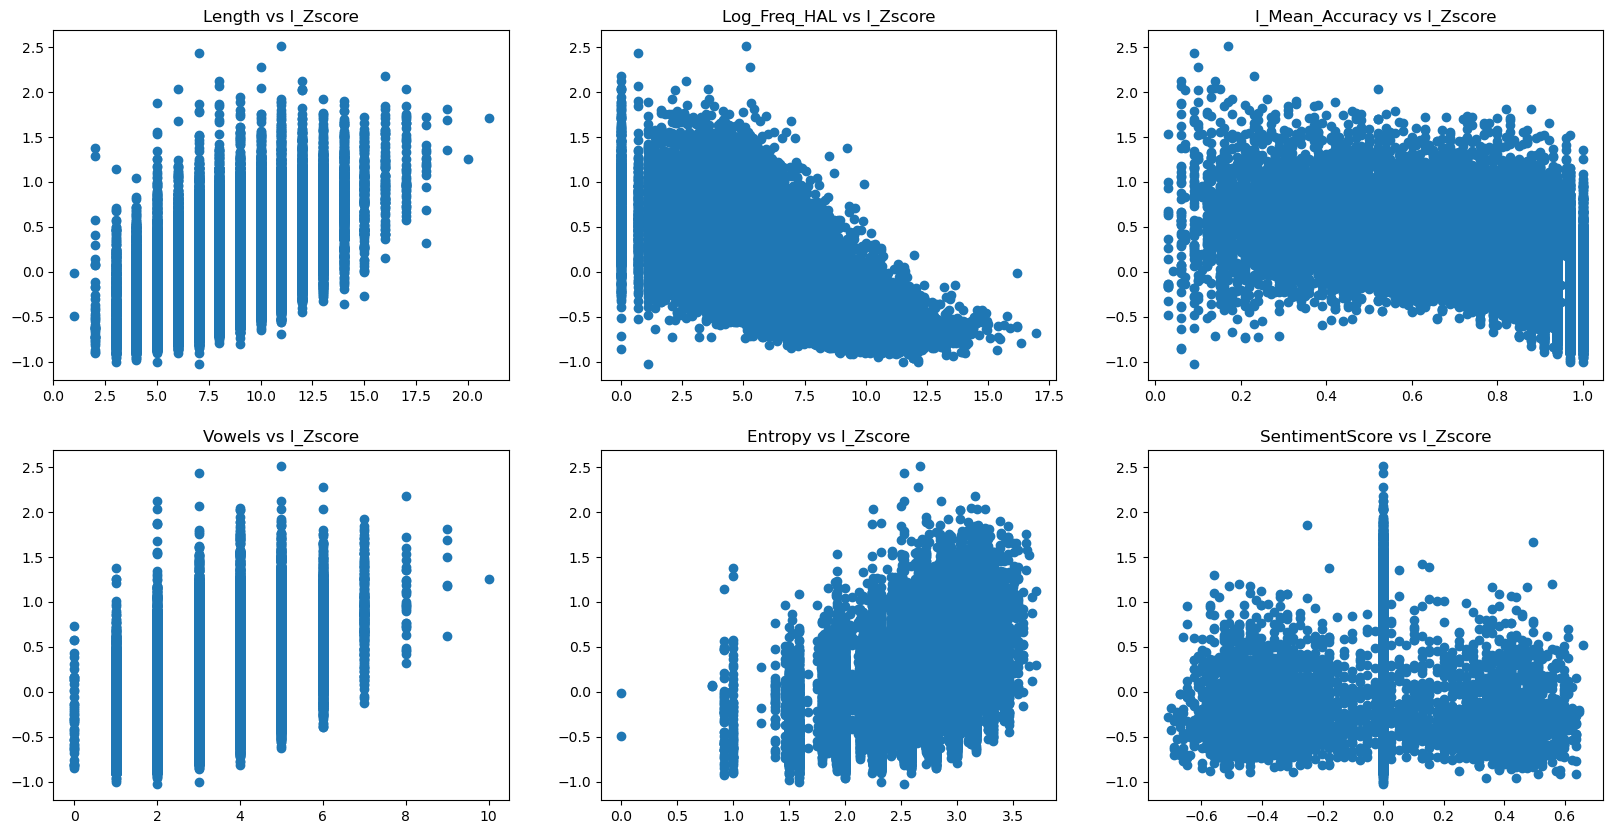

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Scatter plot 1
axes[0, 0].scatter(df['Length'], df['I_Zscore'])
axes[0, 0].set_title('Length vs I_Zscore')

# Scatter plot 2
axes[0, 1].scatter(df['Log_Freq_HAL'], df['I_Zscore'])
axes[0, 1].set_title('Log_Freq_HAL vs I_Zscore')

# Scatter plot 3
axes[0, 2].scatter(df['I_Mean_Accuracy'], df['I_Zscore'])
axes[0, 2].set_title('I_Mean_Accuracy vs I_Zscore')

# Scatter plot 4
axes[1, 0].scatter(df['Vowels'], df['I_Zscore'])
axes[1, 0].set_title('Vowels vs I_Zscore')

# Scatter plot 5
axes[1, 1].scatter(df['Entropy'], df['I_Zscore'])
axes[1, 1].set_title('Entropy vs I_Zscore')

# Scatter plot 6
axes[1, 2].scatter(df['SentimentScore'], df['I_Zscore'])
axes[1, 2].set_title('SentimentScore vs I_Zscore')

# Show plot
plt.show()


Some of these findings can be easily observed, for instance longer words may take more time to process and understand resulting more difficulty. This feature shares a similar relationship I mean RT as it is positively correlated. Of course, also similar to vowels as more vowels could mean a longer word in general. The log freq HAL or Hyperspace Analogue to Language frequency norms is based on higher values may indicate more frequent words in a corpus. More words encountered could mean trivial words, such as articles or basic everyday words, which are the easy words to understand on the difficulty scale. Other features we get a lot of noise...

pls dont roast grammer i will fix it in the ifnal report

### DR

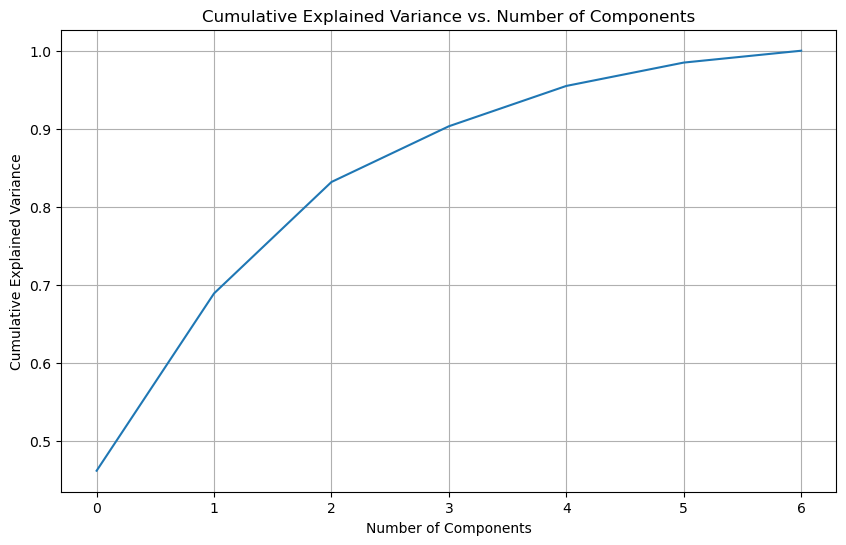

In [8]:
# Looks like ~30 components

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Apply PCA
n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

comp = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [10]:
# Access loadings
loadings_matrix = pca.components_

# Interpret loadings
for i in range(n_components):
    print(f"Principal Component {i+1}:")
    component_loadings = loadings_matrix[i]
    sorted_indices = component_loadings.argsort()[::-1]
    for j in sorted_indices:
        print(f"- {df.columns[j]}: {component_loadings[j]}")
    print()

Principal Component 1:
- Length: 0.4840022364377465
- I_Zscore: 0.46010232295015474
- Vowels: 0.44528135591471163
- Entropy: 0.42232012510941114
- SentimentScore: 0.007437722703226877
- I_Mean_Accuracy: -0.20323826421105534
- Log_Freq_HAL: -0.3688587829819507

Principal Component 2:
- I_Zscore: 0.3236887817611635
- SentimentScore: -0.027338318698642235
- Vowels: -0.2910232534850554
- Length: -0.32645209013729654
- Entropy: -0.33469099967792537
- Log_Freq_HAL: -0.39678572230524967
- I_Mean_Accuracy: -0.658601330835249

Principal Component 3:
- I_Mean_Accuracy: 0.03363147717516629
- Length: 0.010782450433682457
- Entropy: 0.0076711469617433085
- Vowels: 0.006180718368366663
- I_Zscore: 0.0033424275017817496
- Log_Freq_HAL: -0.00411917149178713
- SentimentScore: -0.9993135020277775



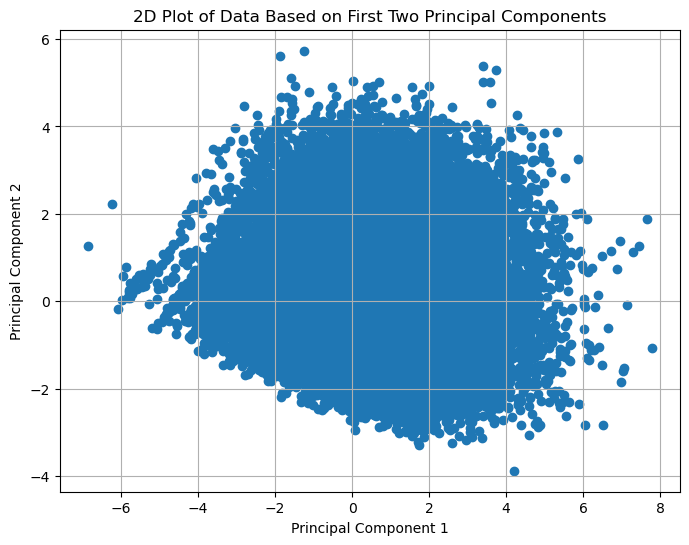

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(comp['PC1'], comp['PC2'])
plt.title('2D Plot of Data Based on First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Regression

We will be using regression to observe for reduction or growth in the correlation metric `r^2` in a one vs. one manner. This will be down by comparing the `r^2` without dropping any features with a the `r^2` after droping a specific feature. Any slight difference, say 10% based on the 10% Confounding Rule, would mean that this specific feature that was dropped has a significant impact on the word difficulty. Analagous to feature permutation

In [12]:
regression_df = df.drop('I_Zscore', axis=1)

regression = LinearRegression()
regression.fit(regression_df, df['I_Zscore'])

benchmark_r = regression.score(regression_df, df['I_Zscore'])
print(f"Benchmark R^2 value: {benchmark_r}")

Benchmark R^2 value: 0.726056832508917


In [13]:
# 10% confounding rule
for dropped_feature in regression_df.columns:
    temp_df = regression_df.drop(dropped_feature, axis=1)
    
    conf_regression = LinearRegression()
    conf_regression.fit(temp_df, df['I_Zscore'])
    new_r = conf_regression.score(temp_df, df['I_Zscore'])
    
    if not(benchmark_r * 0.9 < new_r < benchmark_r * 1.1):
        print(dropped_feature)

I_Mean_Accuracy


In [14]:
# Do the same with sklearn's feature pemtuation
perm_importance = permutation_importance(regression, regression_df, df['I_Zscore'], n_repeats=10)

# Get feature importance scores
importance_scores = perm_importance.importances_mean

# Sort feature importance scores and corresponding feature names
sorted_indices = importance_scores.argsort()[::-1]
sorted_feature_names = regression_df.columns[sorted_indices]
sorted_scores = importance_scores[sorted_indices]

# Print feature importance scores
for name, score in zip(sorted_feature_names, sorted_scores):
    print(f"{name}: {score}")

I_Mean_Accuracy: 0.4348541265469808
Length: 0.4256458566134489
Log_Freq_HAL: 0.14541221365379123
Vowels: 0.025676463543301366
Entropy: 0.024883233610184474
SentimentScore: 0.0002888115788659551


Looks like I_Mean_Accuracy is a really important feature for determining difficulty. In fact, anything else is very miniscule. 

### Kmeans

In [17]:
with_dificulty_scores = []
inertia = []
for n in [2, 3, 6, 9, 12, 15, 18, 21, 24]:
    knn = KMeans(n_clusters=n)
    labels = knn.fit_predict(df)
    
    inertia.append(knn.inertia_)
    with_dificulty_scores.append(silhouette_score(df, labels))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

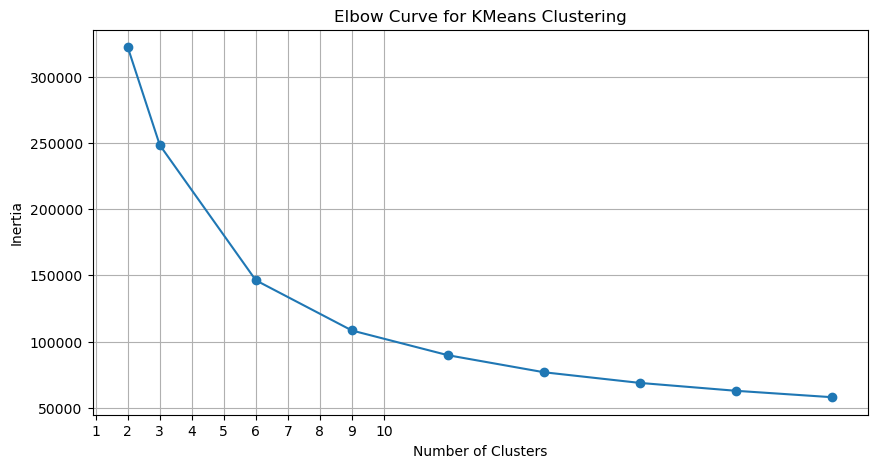

In [18]:
plt.figure(figsize=(10, 5))
plt.plot([2, 3, 6, 9, 12, 15, 18, 21, 24], inertia, marker='o')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Plotting the first two components should a giant blob dot. i think this dataset is inherently dense together that 1 single cluster captures all. so maybe preferably use PCA

In [19]:
with_dificulty_scores

[0.35117518922916313,
 0.3012083543074723,
 0.27532160568736735,
 0.2628988479732754,
 0.24969210475877107,
 0.2444526584195882,
 0.23691085185522487,
 0.2267857073667581,
 0.2278807486130501]

In [ ]:
pca_scores = []
for n in [2, 3, 6, 12, 24]:
    knn = KMeans(n_clusters=n)
    labels = knn.fit_predict(comp)
    
    pca_scores.append(silhouette_score(comp, labels))

In [ ]:
pca_scores

In [20]:
knn = KMeans(n_clusters=9)
labels = knn.fit_predict(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
kmeans_df = df
kmeans_df['Labels'] = labels

kmeans_df.head()

,Length,Log_Freq_HAL,I_Zscore,I_Mean_Accuracy,Vowels,Entropy,SentimentScore,Labels
Word,,,,,,,,
a,1,16.18,-0.01,0.73,1,-0.000000,0.0,8
aah,3,5.40,0.21,0.62,2,0.918296,0.0,4
aaron,5,9.29,-0.11,0.97,3,1.921928,0.0,8
aback,5,5.96,0.11,0.45,2,1.921928,0.0,4
abacus,6,6.24,0.65,0.47,3,2.251629,0.0,4


In [22]:
def std(x): 
    return np.std(x)

kmeans_df.groupby('Labels').agg(['mean', std])

Length           Log_Freq_HAL            I_Zscore            \
             mean       std         mean       std      mean       std   
Labels                                                                   
0       10.958691  1.061878     7.396467  1.066123  0.074383  0.316930   
1        7.894139  0.764346     6.465537  0.695423 -0.097241  0.301930   
2        9.712983  0.845272     4.711317  0.821028  0.292427  0.376632   
3        7.830593  0.952350     8.967589  0.964815 -0.359976  0.208249   
4        5.218056  0.855144     6.789824  0.909580 -0.211768  0.302451   
5        6.780738  0.917066     4.199856  0.926402  0.125765  0.336011   
6        9.230617  1.346666     1.437061  1.074322  0.506974  0.414430   
7       13.076406  1.370202     4.008396  1.576579  0.749181  0.397212   
8        4.784235  1.035639     9.955472  1.317918 -0.552313  0.214245   

       I_Mean_Accuracy              Vowels             Entropy            \
                  mean       std      mean       std      mean       std   
Labels                                                                     
0             0.936757  0.091862  4.373122  0.846602  2.957013  0.234588   
1             0.886259  0.146177  2.893146  0.704195  2.662180  0.253970   
2             0.799271  0.201954  3.745988  0.774922  2.862012  0.246353   
3             0.964672  0.056507  2.962116  0.735592  2.640229  0.266813   
4             0.834733  0.188474  1.818944  0.657100  2.196995  0.314158   
5             0.692637  0.240906  2.374186  0.662888  2.495816  0.293792   
6             0.650403  0.256692  3.437500  0.895251  2.817213  0.272015   
7             0.805105  0.197026  5.279177  0.991853  3.106493  0.220603   
8             0.955722  0.083651  1.689586  0.620902  2.085009  0.362475   

       SentimentScore            
                 mean       std  
Labels                           
0           -0.002286  0.150922  
1           -0.008847  0.132593  
2           -0.003657  0.105326  
3            0.002243  0.160040  
4           -0.008841  0.108314  
5           -0.004357  0.077531  
6           -0.000590  0.074172  
7           -0.000786  0.102054  
8           -0.005152  0.153550

In [25]:
import colorcet as cc
# Group by 'Label'
grouped = kmeans_df.groupby('Labels')

palette = sns.color_palette(cc.glasbey, n_colors=9)

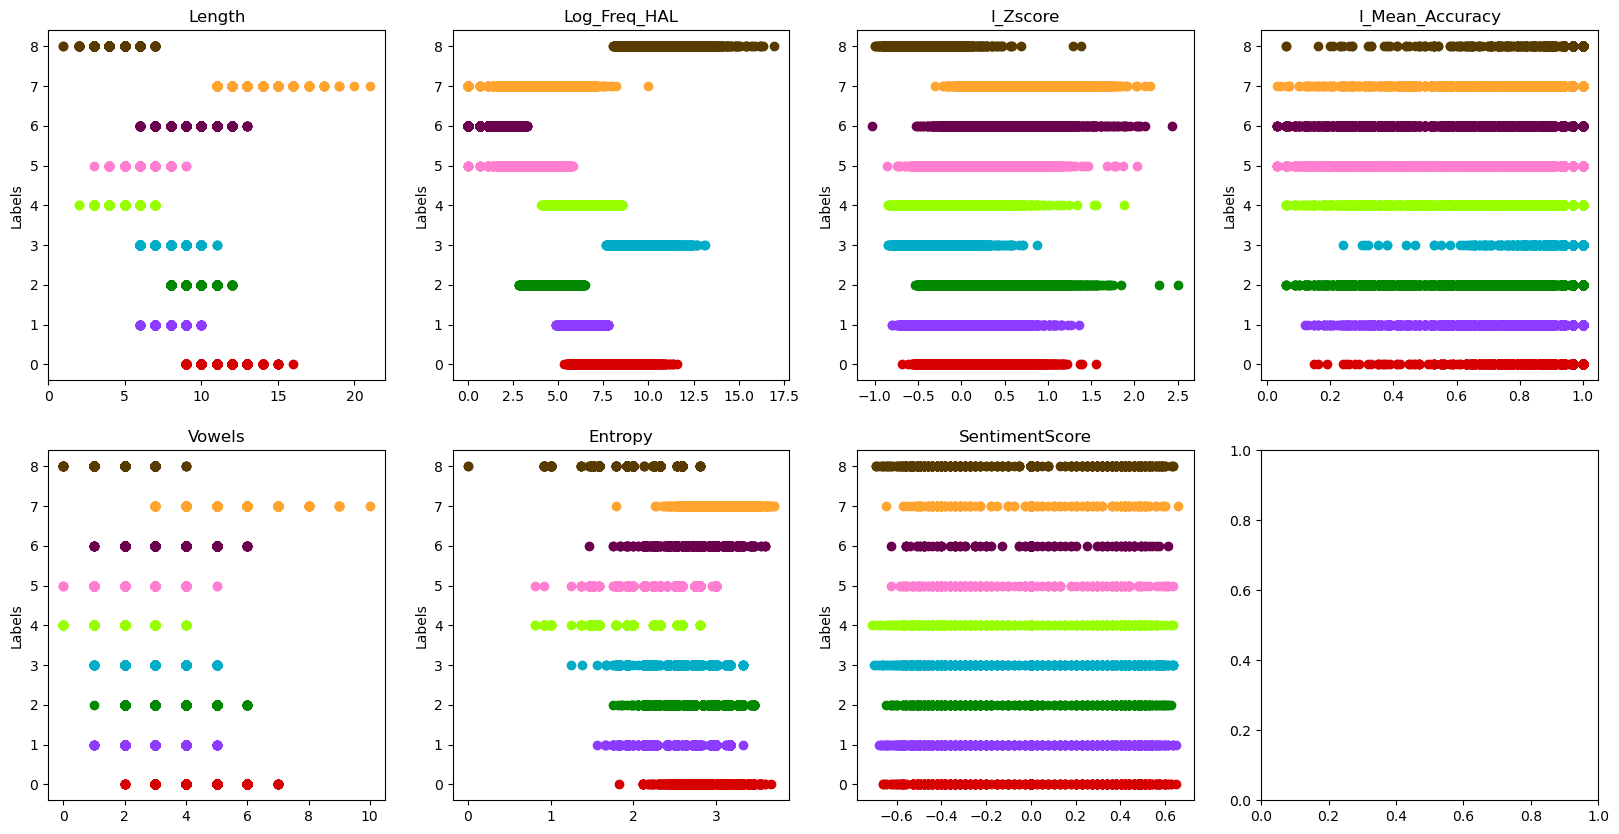

In [26]:
# Create subplots
fig, axes = plt.subplots(2,4, figsize=(20, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, (feature, data) in enumerate(kmeans_df.drop('Labels', axis=1).items()):
    for j, (label, group) in enumerate(grouped):
        axes[i].scatter(group[feature], np.full_like(group[feature], j), color=palette[j], label=label)

    axes[i].set_title(feature)
    axes[i].set_ylabel('Labels')

In [27]:
# There is hard threshold relationship for RT, other than that not much else
# I_Z score may have been derived from RT in this which is why there is an apparent "split" relationship where
# we can treshold

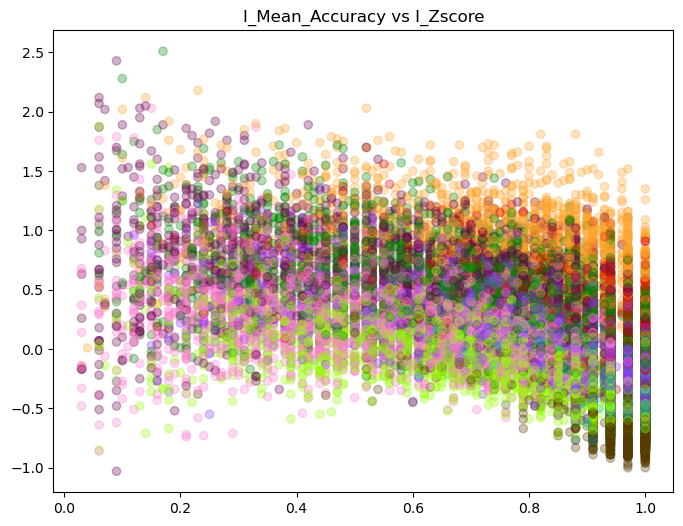

In [28]:
colors = pd.Categorical(df['Labels']).codes
colors = [palette[i] for i in colors]

plt.figure(figsize=(8, 6))
plt.scatter(kmeans_df['I_Mean_Accuracy'], kmeans_df['I_Zscore'], c=colors, label=df['Labels'], alpha=0.3)
plt.title('I_Mean_Accuracy vs I_Zscore')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


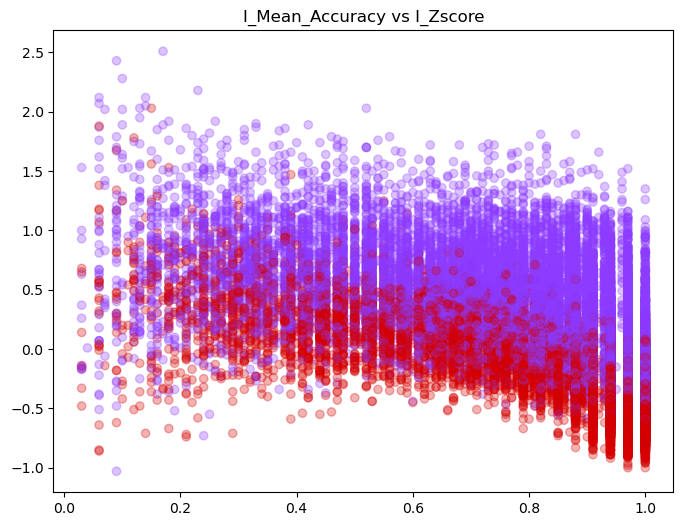

In [29]:
knn = KMeans(n_clusters=2)
labels = knn.fit_predict(df)
kmeans_df = df
kmeans_df['Labels'] = labels
grouped = kmeans_df.groupby('Labels')
palette = sns.color_palette(cc.glasbey, n_colors=2)

colors = pd.Categorical(df['Labels']).codes
colors = [palette[i] for i in colors]

plt.figure(figsize=(8, 6))
plt.scatter(kmeans_df['I_Mean_Accuracy'], kmeans_df['I_Zscore'], c=colors, label=df['Labels'], alpha=0.3)
plt.title('I_Mean_Accuracy vs I_Zscore')
plt.show()

### Word Embeddings

In [ ]:
## This may take a while
# import gensim.downloader as api
# path = api.load("word2vec-google-news-300", return_path=True)
# print(path)

In [ ]:
words = [[i] for i in df.index]

In [ ]:
# This may take a while
from gensim.models import KeyedVectors

path = '/Users/kendrick/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'
word2vec_model = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
filtered_word_dataset = [word for word in words if word[0] in word2vec_model]

In [ ]:
len(filtered_word_dataset)

In [ ]:
word_vectors = {}
for i in filtered_word_dataset:
    try:
        vector = word2vec_model[i]
        word_vectors.update({i[0]: vector})
        
    except:
        print(f'Not in model {i}')

In [ ]:
len(word_vectors)

In [ ]:
df.loc['actors']

In [ ]:
np.array(word_vectors)

In [ ]:
# # Convert word_vectors to numpy array and reshape if necessary
# word_vectors_array = np.array(word_vectors.values())
# if len(word_vectors_array.shape) == 3:
#     # Reshape the array if it has three dimensions
#     word_vectors_array = word_vectors_array.reshape(len(word_vectors_array), -1)
    
# # Extract difficulty scores from DataFrame
# difficulty = np.array([df.loc[i]['I_Zscore'] for i in word_vectors.keys()])

# # Combine word vectors and difficulty scores into a single dataset
# combined_data = np.hstack((word_vectors_array, difficulty))

In [ ]:
# # Normalize the data
# normalized_data = (combined_data - combined_data.mean(axis=0)) / combined_data.std(axis=0)

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=2)
# cluster_labels = kmeans.fit_predict(normalized_data)

# # Print cluster labels
# print("Cluster labels:", cluster_labels)